# Pipeline

This pipeline is intended to simplify to whole process of loading a dataset, creating gaps of different types in it, imputing the missing data and evaluating the imputation method.
You may want to edit the cells preceded by an <span style="color: red">**EDIT:**</span> sign to fit your needs.

## Install dependencies

In [10]:
!pip install openpyxl > /dev/null 2>&1
!pip install jupyterlab-widgets > /dev/null 2>&1
!pip install jsfileupload > /dev/null 2>&1
!pip install pyxlsb > /dev/null 2>&1
!pip install sklearn > /dev/null 2>&1
!pip install scipy > /dev/null 2>&1
!pip install scikit_learn > /dev/null 2>&1
!pip install missingpy > /dev/null 2>&1
!pip install fancyimpute > /dev/null 2>&1

## Load clean data

> The upload form only supports files up to 10Mo. For larger files, please upload them directly to JupyterHub and provide a relative link to them in the text input herebelow.

In [13]:
%run helpers/load_data.ipynb

# config_select.value = "factory zero"
# file_select.value = "054.xlsx"
# dfloader.add_index_as_feature('Date')
# dfloader.add_targets('flow_temp', sheet_name='alklimaHeatPump')
# dfloader.add_targets('op_mode', sheet_name='alklimaHeatPump')
# dfloader.add_targets('power', sheet_name='smartMeter')
# dfloader.add_targets('co2', sheet_name='co2sensor')

config_select.value = "knmi"
file_select.value = "260 De Bilt.csv"
dfloader.add_targets('Relative atmospheric humidity')
# dfloader.add_targets('radiation')
# dfloader.add_targets('temperature')


Dropdown(description='Config:', options=('factory zero', 'knmi'), value='factory zero')

In [14]:
df = dfloader.df
orig_size = len(df)
df = df.dropna(subset=dfloader.features)
size_after_drop = len(df)
print(f'Dropping {orig_size - size_after_drop} rows (NaN values in features)')
df.head()

Dropping 0 rows (NaN values in features)


,Relative atmospheric humidity
2018-01-01 00:00:00,73
2018-01-01 01:00:00,90
2018-01-01 02:00:00,79
2018-01-01 03:00:00,74
2018-01-01 04:00:00,76


In [15]:
# Only run this for faster testing
# df = df.head(10000)

## Set an arbitrary random state

In [16]:
import random
random_state = 0
random.seed(random_state)

## Create gaps of different sizes

In [17]:
%run helpers/create_gaps.ipynb

HTML(value='')

## Run the imputation

In [18]:
%run helpers/impute.ipynb

Dropdown(description='Imputer:', options=('median imputation', 'mode imputation', 'mean imputation', 'fillna',…

HTML(value='')

## Evaluate the imputation results

,Mean squared error,Raw bias,Absolute bias,Percent bias,Errors sum,Mean minimum error,Mean maximum error,Maximum error,Variance error sum,Average variance error,...,Median error sum,Average median error,Method,Gap type,Gap count,Random state,Target field,Date,File,Imputer config
linear_interpolation - Relative atmospheric humidity - gap type 1 - 2022-01-08 16:19:00,27.403,0.043,3.633,-0.055,15132.705,-2.546,-0.425,28.00,16445.321,12.191,...,4393.5,3.257,linear_interpolation,1 [1:00:00-6:00:00],1349,0,Relative atmospheric humidity,2022-01-08 16:19:00,260 De Bilt.csv,None
linear_interpolation - Relative atmospheric humidity - gap type 2 - 2022-01-08 16:19:00,198.131,-0.199,9.873,0.254,54628.946,-5.050,-1.722,55.60,32783.889,80.550,...,3739.0,9.187,linear_interpolation,"2 [6:00:00-1 day, 0:00:00]",407,0,Relative atmospheric humidity,2022-01-08 16:19:00,260 De Bilt.csv,None
linear_interpolation - Relative atmospheric humidity - gap type 3 - 2022-01-08 16:19:00,261.939,1.516,11.997,-1.927,71527.578,-12.389,12.395,56.00,19609.048,144.184,...,1132.0,8.324,linear_interpolation,"3 [1 day, 0:00:00-3 days, 0:00:00]",136,0,Relative atmospheric humidity,2022-01-08 16:19:00,260 De Bilt.csv,None
linear_interpolation - Relative atmospheric humidity - gap type 4 - 2022-01-08 16:19:00,291.667,-0.029,13.174,0.037,78070.121,-2.110,15.587,67.78,7731.049,145.869,...,378.5,7.142,linear_interpolation,"4 [3 days, 0:00:00-7 days, 0:00:00]",53,0,Relative atmospheric humidity,2022-01-08 16:19:00,260 De Bilt.csv,None


<IPython.core.display.Javascript object>


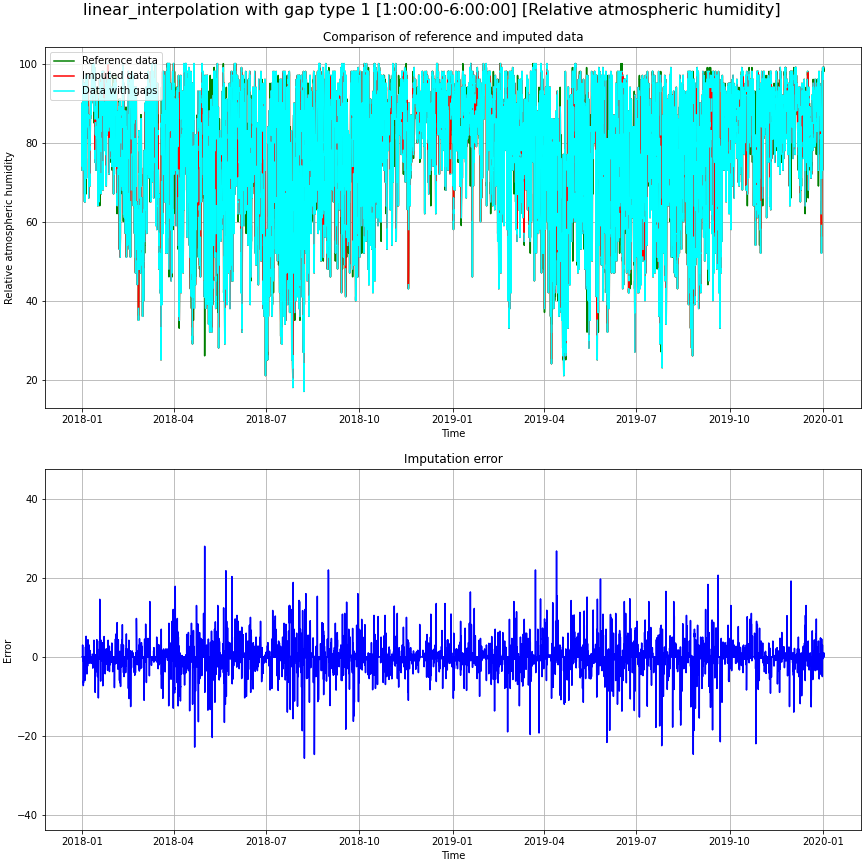

<IPython.core.display.Javascript object>


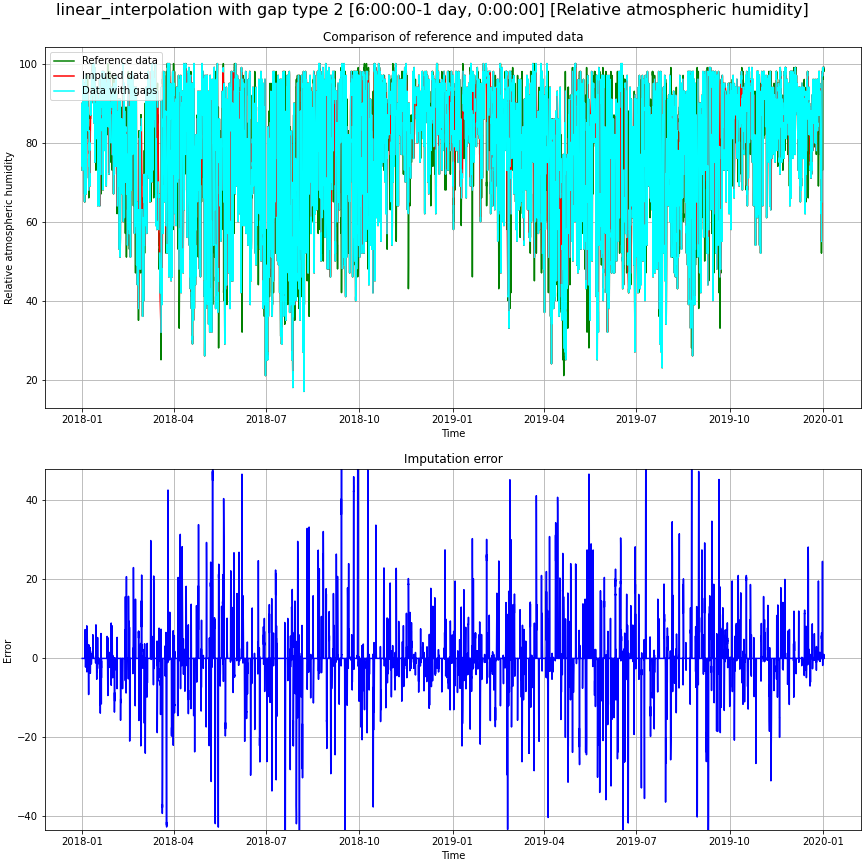

<IPython.core.display.Javascript object>


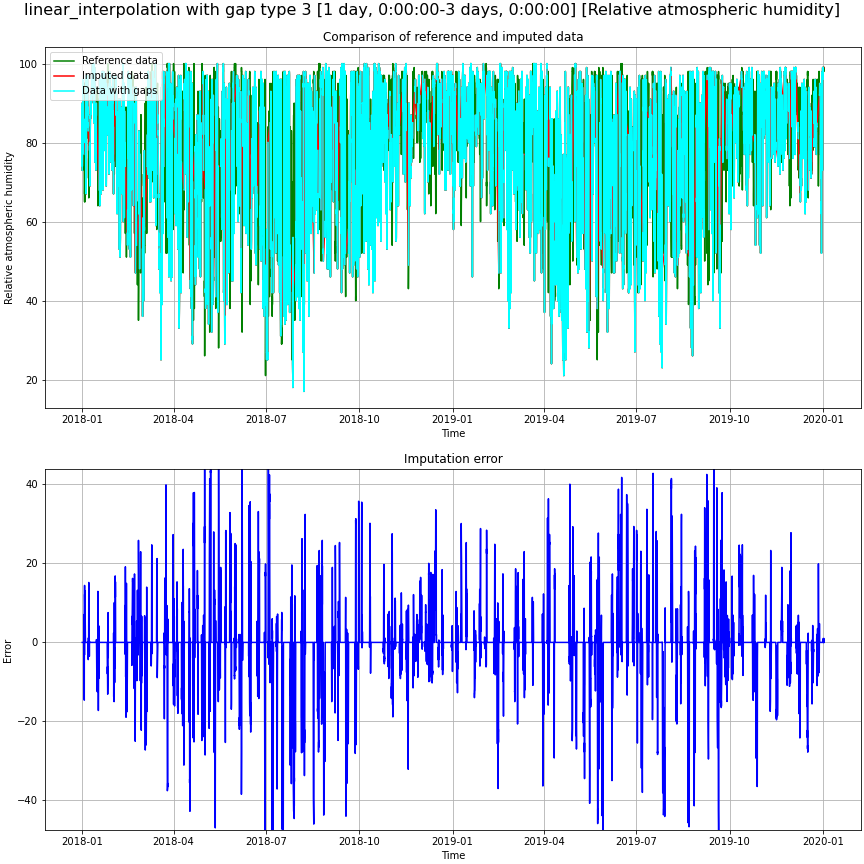

<IPython.core.display.Javascript object>


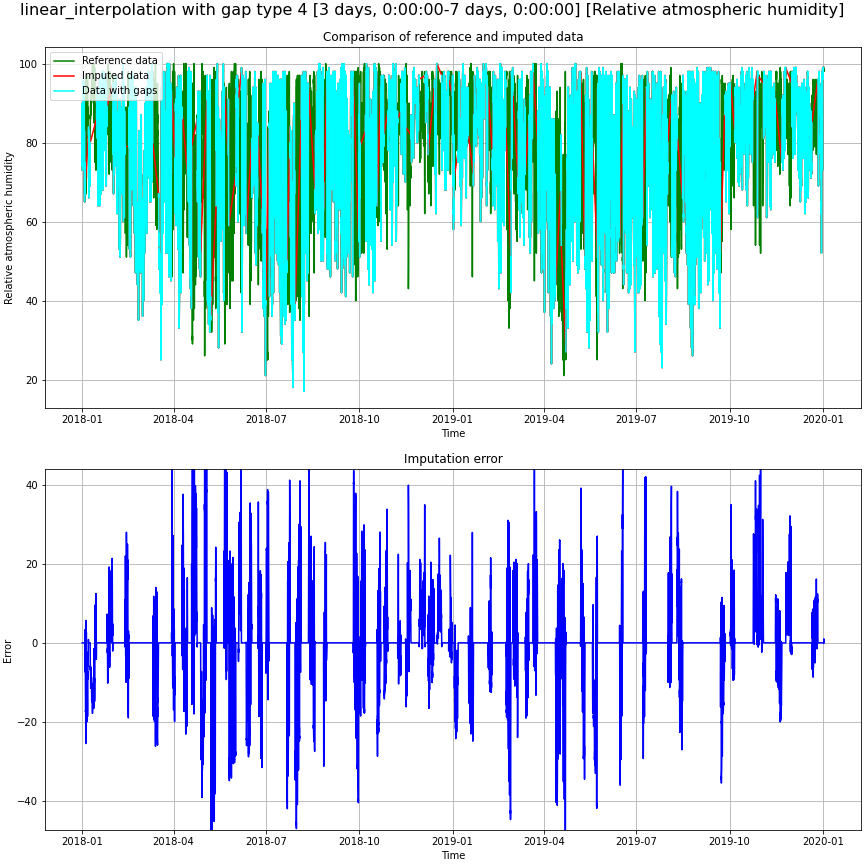

In [19]:
%run helpers/evaluate.ipynb

In [9]:
%run helpers/saving.ipynb

Button(description='Save evaluation results', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='Save results in sub-folder', layout=Layout(width='20%'), style=ButtonStyle())